In [1]:
import scipy as sp
from src.PLS.utils import meta_mle
from src.PLS.utils import meta_mle_sir
import numpy as np
from src.PLS.metaSIR import meta_timed_sir
from decimal import Decimal, ROUND_UP
from src.PLS.metaSIR import basic_square_map
from src.PLS.metaSIR import straight_line_distances
from src.PLS.metaSIR import basic_kernel
import time
def opt_mle(paras):
    return - meta_mle(paras[0]/div,gamma,timed_real,times_real,tmax, basic_kernel,test_distances,causes)
import seaborn as sns

In [2]:
def meta_mle(beta,gamma,sol,time_list,tmax,kernel,distances,causes):
    N = len(sol[0])
    L1 = 0
    node_list = np.arange(0,N)
    for j in range(N): #iterate for each node
        t = 0
        for i in range(0, len(time_list) - 1):
            if ((sol[i+1][j][1] == sol[i][j][1]) and (sol[i+1][j][0] == sol[i][j][0])):
                pass # do nothing if the event will be counted later
            elif (sol[i + 1][j][1] - sol[i][j][1]) > 0: # if infection

                #calculate exponential term: need to iterate over every possible event! Many are possible alas.
                expo = 0
                #add domestic events
                for node in node_list:
                    expo += (beta) * sol[i][node][0] * sol[i][node][1] + gamma * sol[i][node][1]
                # add foreign infections
                for node in node_list:
                    foreign_nodes = np.delete(node_list,node)
                    for foreign_n in foreign_nodes:
                        expo += kernel((beta) * sol[i][node][0] * sol[i][foreign_n][1],distances[node,foreign_n])

                expo = -expo*(time_list[i+1]-time_list[i])
                if causes[i] == "d":
                    pre_expo = np.log((beta) * sol[i][j][0] * sol[i][j][1])
                else:
                    pre_expo = np.log(kernel((beta) * sol[i][j][0] * sol[i][causes[i]-1][1],distances[j,causes[i]-1]))
                    print(kernel((beta) * sol[i][j][0] * sol[i][causes[i]-1][1],distances[j,causes[i]-1]))

                L1 += (pre_expo+ expo) #infection
            else: #if recovery
                pre_expo = gamma * sol[i][j][1]
                expo = 0
                #add domestic events
                for node in node_list:
                    expo += (beta) * sol[i][node][0] * sol[i][node][1] + gamma * sol[i][node][1]
                # add foreign infections
                for node in node_list:
                    foreign_nodes = np.delete(node_list,node)
                    for foreign_n in foreign_nodes:
                        expo += kernel((beta) * sol[i][node][0] * sol[i][foreign_n][1],distances[node,foreign_n])
                expo = -expo*(time_list[i+1]-time_list[i])
                L1 += (np.log(pre_expo) + expo)
        L2 = 0
    return L1 + L2

In [3]:
R0 = 5
mle_b = []
start_time = time.time()

seed = 1
N = 4
test_map = basic_square_map(N)
test_distances = straight_line_distances(test_map, N, scaling=10)
print(test_distances)
gamma = 1
X0 = [[999, 1, 0]]
div = sum(X0[0])
for i in range(N - 1):
    X0.append([1000, 0, 0])
beta = R0 / div
rng = np.random.default_rng(seed)
tstep = 0.01
tmax = 100
tmax = float(Decimal(tstep) * (Decimal(meta_timed_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)) / Decimal(tstep)).quantize(1, rounding=ROUND_UP))
rng = np.random.default_rng(seed)
start_time = time.time()
times_real, timed_real, causes = meta_mle_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)

[[ 0.         10.         10.         14.14213562]
 [10.          0.         14.14213562 10.        ]
 [10.         14.14213562  0.         10.        ]
 [14.14213562 10.         10.          0.        ]]


[0.15   0.1515 0.153  0.1545 0.156  0.1575 0.159  0.1605 0.162  0.1635
 0.165  0.1665 0.168  0.1695 0.171  0.1725 0.174  0.1755 0.177  0.1785
 0.18   0.1815 0.183  0.1845 0.186  0.1875 0.189  0.1905 0.192  0.1935
 0.195  0.1965 0.198  0.1995 0.201  0.2025 0.204  0.2055 0.207  0.2085
 0.21   0.2115 0.213  0.2145 0.216  0.2175 0.219  0.2205 0.222  0.2235
 0.225  0.2265 0.228  0.2295 0.231  0.2325 0.234  0.2355 0.237  0.2385
 0.24   0.2415 0.243  0.2445 0.246  0.2475 0.249  0.2505 0.252  0.2535
 0.255  0.2565 0.258  0.2595 0.261  0.2625 0.264  0.2655 0.267  0.2685
 0.27   0.2715 0.273  0.2745 0.276  0.2775 0.279  0.2805 0.282  0.2835
 0.285  0.2865 0.288  0.2895 0.291  0.2925 0.294  0.2955 0.297  0.2985
 0.3    0.3015 0.303  0.3045 0.306  0.3075 0.309  0.3105 0.312  0.3135
 0.315  0.3165 0.318  0.3195 0.321  0.3225 0.324  0.3255 0.327  0.3285
 0.33   0.3315 0.333  0.3345 0.336  0.3375 0.339  0.3405 0.342  0.3435
 0.345  0.3465 0.348  0.3495 0.351  0.3525 0.354  0.3555 0.357  0.3585
 0.36 

<Axes: >

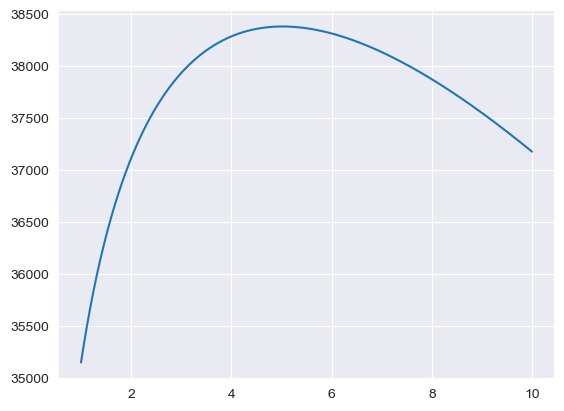

In [4]:
betas = np.arange(1,10,0.01)
ml1000 = lambda x:meta_mle(x/div,1,timed_real,times_real,tmax,basic_kernel,test_distances,causes)
mles_1000 = ml1000(betas)
sns.lineplot(x=betas,y=mles_1000)

In [5]:
found = False
for j in range(20):
    w = sp.optimize.minimize(opt_mle,x0=(4.0+j/10))
    if found == False:
        found = True
        best_b = w.x[0]
        best = w.fun
    elif w.fun < best:
        best = w.fun
        best_b = w.x[0]
mle_b.append(best_b)
print(f"MLE took {time.time() - start_time} seconds to run")

0.6
4.4
2.4999999999999996
0.6000000022351741
4.400000016391277
2.5000000093132253
0.7515
5.511
3.1312499999999996
0.7515000022351741
5.511000016391278
3.1312500093132254
0.7523460779368872
5.517204571537174
3.13477532473703
0.7523460801720614
5.51720458792845
3.1347753340502558
0.7525453965667631
5.518666241489597
3.1356058190281795
0.7525453988019373
5.518666257880874
3.135605828341405
0.7525580055311836
5.518758707228679
3.1356583563799316
0.7525580077663578
5.518758723619957
3.1356583656931574
0.7525556413503548
5.518741369902601
3.1356485056264782
0.7525556435855291
5.518741386293879
3.135648514939704
0.7525461846270396
5.51867202059829
3.1356091026126642
0.7525461868622138
5.518672036989567
3.13560911192589
0.7525520394167647
5.518714955722942
3.1356334975698528
0.7525520416519389
5.5187149721142195
3.1356335068830785
0.7525549773339313
5.51873650044883
3.13564573889138
0.7525549795691054
5.518736516840107
3.1356457482046056
0.7525553536099047
5.518739259805967
3.1356473067079356

KeyboardInterrupt: 

In [ ]:
print(mle_b)